# EDA

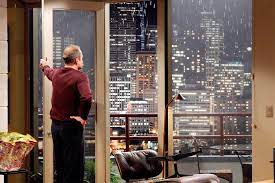

### My client is *Erin Robinson*! <br>
Miss Robinson is a buyer with a vision to improve the conditions of the socioeconomic disadvantaged in Kings County. <br>
Her aim is to:<br>
* <span style="color:black"> buy in a poorer district 
* <span style="color:black"> probably want to renovate
* <span style="color:black"> re-sell with a minimal profit!


Therefore, I will analyse my DB for:
* <span style="color:black"> zip codes, where houses are significantly cheaper compared to the average in the distance to the city center?
* <span style="color:black"> houses, which weren't renovated for a very long time and/or are in a bad (not worst) overall condition and/or have a low (not worst) overall grade? <br><span style="color:grey"> *(Because: Miss Robinson aims to renovate houses to improve the living conditions of the people in that district. <br> 
If a house in very bad conditions it is cheaper to be wrecked and rebuilt. <br>
A newly built house is to expensive for the people Miss Robinson is doing her buisness for and would either end up in loss for Miss Robinson <br>
**or** with the inlfux of socioeconomic more advantaged people displacing the more disadvantaged ones!)*
* <span style="color:black"> investigate the relative profit per region a renovation does to estimate the "minimal profit"?

## Hypotheses:	<b>
1. There are zipcodes, where the house-prices are significantly cheaper than the average house-price in Kings county. <b>
2. The cheaper the houses are in relation to the average prices in that zipcode-region, the longer they have not been renovated. <b>
3. Renovating a house increases its worth, independent of the region it is located in.

### Starting with importing needed libraries and fetching the data:

In [21]:
# importing the necessary libaries:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import psycopg2
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import missingno as msno
import plotly.express as px

# predefined code from neue fische to alter the float format and predefine figures?
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [22]:
#read the database string from the .env:
load_dotenv() # loading of the .env file

DB_STRING = os.getenv('DB_STRING') # calling the informations from .env
stri_db = create_engine(DB_STRING) # connecting to the DB


# fetching and joining the tables:
query_string = "SET SCHEMA 'eda'; SELECT * FROM eda.king_county_house_details d LEFT JOIN king_county_house_sales s ON d.id = s.house_id;" # SQL query for join and to specify the data from the tables
db_request = pd.read_sql(query_string, stri_db) # fetching the data and assigning a variable for the fetched dataframe 
#db_request.to_csv('eda_project_MergedData.csv',index=False) # possibility to save the cleaned dataframe for easier access in the future

### Exploring the data:

In [23]:
db_request.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [24]:
db_request.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [25]:
db_request.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [26]:
# checking data types
db_request.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id                 int64
dtype: object

<Axes: >

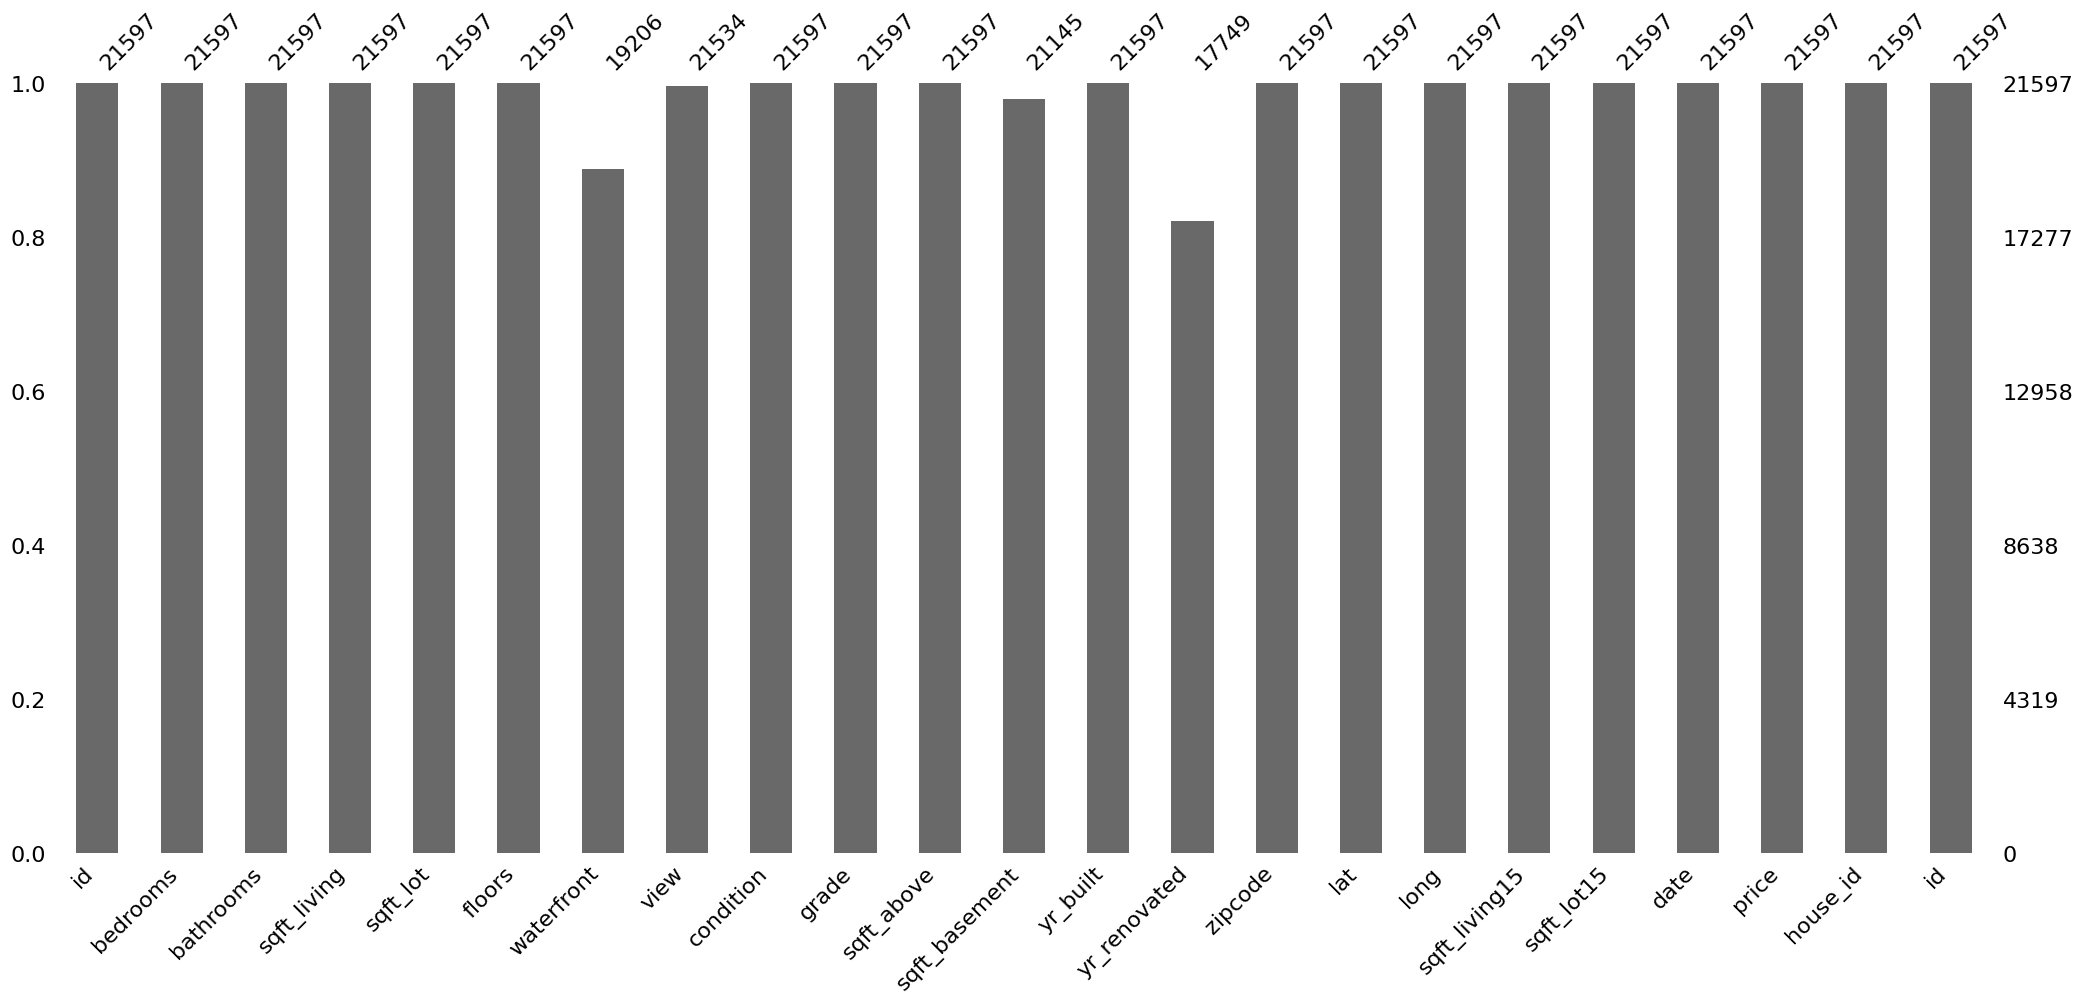

In [27]:
# checking for missing data using missingno:
msno.bar(db_request)

In [28]:
# check how many duplicated rows exist in the data set - in particular for the 
# house_ids as one house might be sold multiple times

db_request[['house_id', 'price']].duplicated().value_counts()

grp_trades_df = db_request.groupby(['house_id','price'])['date'].count().reset_index(name='trades_count')
multi_trades = grp_trades_df[grp_trades_df['trades_count'] > 1]
multi_trades
# no real duplicates as the duplicated house_ids do not have the same date of sale or price, 
# which means: they just have been sold multiple times


,house_id,price,trades_count
4580,1825069031,550000.000,2
14389,6308000010,585000.000,2
18940,8648900110,555000.000,2


### Start of data cleaning

In [29]:
#droping unnecessary or doubled columns, column "id" is in multiple times and identical with "house_id"
db_request.drop('id', axis=1, inplace=True)

In [30]:
# headers are formated as needed


In [31]:
# change date to timestamp
db_request['date'] = pd.to_datetime(db_request['date'], format='%Y/%m/%d')
type(db_request['date'][0])
db_request['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [32]:
# fill na in view
view_imput = int(db_request['view'].mean())

In [33]:
db_request.fillna({'view': view_imput}, inplace=True)

In [34]:
db_request['view'].isna().sum()

np.int64(0)

In [35]:
# bedrooms zu int
db_request = db_request.astype({'bedrooms': int})

# view  zu int
db_request = db_request.astype({'view': int})

# prices to integer, as decimal digits are bad for the plots
db_request = db_request.astype({'price': int})

In [36]:
# dealing with na in renovation year
db_request["yr_renovated"] = (db_request["yr_renovated"]) / 10.0
db_request.loc[(db_request.yr_renovated == 0), 'yr_renovated'] = np.nan
db_request['yr_renovated'] = db_request['yr_renovated'].astype(pd.Int64Dtype())

db_request['yr_renovated'].isna().sum()

np.int64(20853)

In [37]:
# waterfront 1 zu true und 0 zu false, also I wont need this column
db_request['waterfront'].fillna(0, inplace=True)
db_request['waterfront'] = db_request['waterfront'].map({1: True, 0: False})
db_request['waterfront'].head()


0    False
1    False
2    False
3    False
4    False
Name: waterfront, dtype: bool

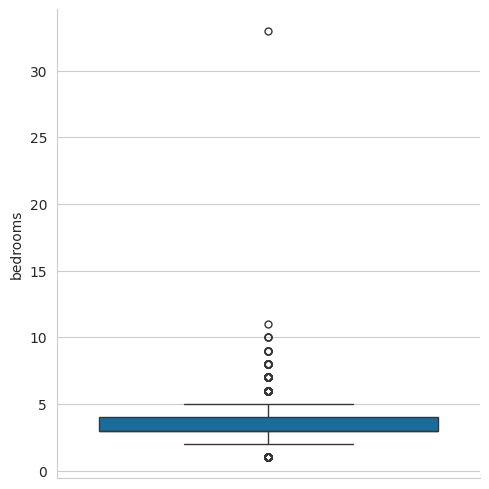

In [38]:
# creating boxplots and scatterplotts to identify outliners in some columns

sns.set_style("whitegrid")

sns.catplot(
    data=db_request,y='bedrooms',
    kind='box', 
    palette="colorblind")

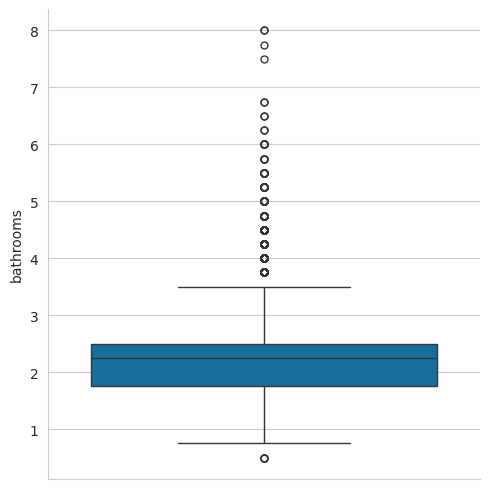

In [39]:
sns.catplot(
    data=db_request,y='bathrooms',
    kind='box', 
    palette="colorblind")

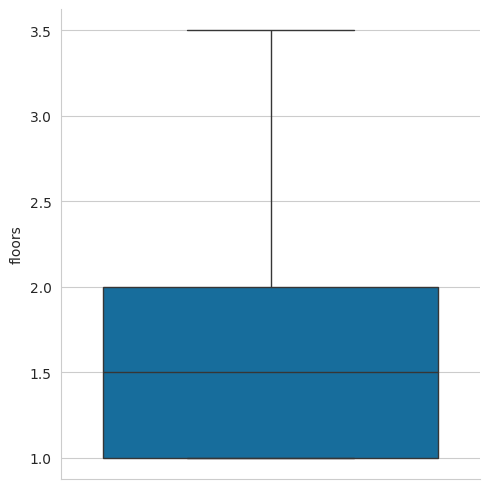

In [40]:
sns.catplot(
    data=db_request,y='floors',
    kind='box', 
    palette="colorblind")

<Axes: xlabel='bedrooms', ylabel='price'>

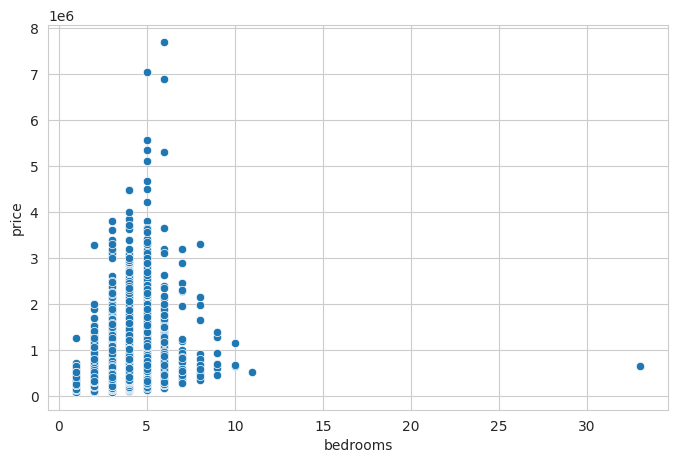

In [41]:
sns.scatterplot(data=db_request, x='bedrooms', y='price')

In [42]:
# Testing provided plots


fig = px.scatter_mapbox(db_request,
                           lat=db_request.lat,
                           lon=db_request.long,
                           color='condition',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )
fig.show()


### Starting with analysis:

1. There are zipcodes, where the house-prices are significantly cheaper than the average house-price in Kings county. <b>

In [ ]:
# how many unique zipcodes to we have?
db_request.zipcode.nunique()

70

In [68]:
# what is the average house price in Kings County:
KC_mean_price = db_request.price.mean()

In [ ]:
# How many zipcodes have houses that cost less than the average house price?
db_request[db_request['price'] < db_request.price.mean()]['zipcode'].nunique()

69

In [71]:
# here I group the houses based on their zipcodes, the define the average price for a house per zipcode
grp_zip = db_request.groupby('zipcode')
grp_zip_mean = db_request.groupby('zipcode').mean('price').reset_index()

# Now I create a DF of those zipcodes, having a lower average house price than the average of whole Kings County
poorer_zip = grp_zip_mean[grp_zip_mean['price'] < KC_mean_price]

poorer_zip['zipcode'].count() # to see how many zip codes have an average price below the overall average price

np.int64(38)

In [ ]:
# Start plotting this on a map:
fig_belowAvgPrice_map = px.choropleth_mapbox(poorer_zip,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Neighborhoods with average house prices below the total house-price average in Kings County',
                           mapbox_style='open-street-map', zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": poorer_zip['lat'].mean(), "lon": poorer_zip['long'].mean()}
                     )

# adding map-plot with the all zip codes to see the difference:
figCondition = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='condition',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

figPrice = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by price',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

fig_belowAvgPrice_map.show()#, figCondition.show(), figPrice.show()

In [47]:
prices_q1 = db_request.price.quantile(0.25)
grp_zip_q1 = grp_zip_mean[grp_zip_mean['price'] < prices_q1]

In [48]:

fig_q1 = px.choropleth_mapbox(grp_zip_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average house price in the first quantile',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": grp_zip_q1['lat'].mean(), "lon": grp_zip_q1['long'].mean()}
                     )

figCondition = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='condition',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

figPrice = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by price',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

fig_q1.show()#, figCondition.show(), figPrice.show()

In [49]:
# zipcodes are ok but if the sqfeet are simply less the prices qill stay lower as well, so lets calculate the average sqft price per zip code
# I will start by creating two new columns, that calculates the average sqft price per house

db_request.eval('sqft_living_price = price/sqft_living', inplace = True)
db_request.eval('sqft_lot_price = price/sqft_lot', inplace = True)
db_request.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sqft_living_price,sqft_lot_price
0,3,1.000,1180.000,5650.000,1.000,False,0,3,7,1180.000,...,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900,7129300520,188.051,39.274
1,3,2.250,2570.000,7242.000,2.000,False,0,3,7,2170.000,...,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000,6414100192,209.339,74.289
2,2,1.000,770.000,10000.000,1.000,False,0,3,6,770.000,...,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000,5631500400,233.766,18.000
3,4,3.000,1960.000,5000.000,1.000,False,0,5,7,1050.000,...,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000,2487200875,308.163,120.800
4,3,2.000,1680.000,8080.000,1.000,False,0,3,8,1680.000,...,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000,1954400510,303.571,63.119


In [50]:
grp_zip_mean_sq = db_request.groupby('zipcode').mean('sqft_living_price').reset_index()
grp_zip_mean_sqlot = db_request.groupby('zipcode').mean('sqft_lot_price').reset_index()

grp_zip_mean_sq, grp_zip_mean_sqlot

(    zipcode  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
 0     98001     3.393      2.012     1903.784 14967.003   1.431       0.000   
 1     98002     3.327      1.839     1627.744  7517.633   1.334       0.000   
 2     98003     3.357      2.047     1928.882 10603.096   1.311       0.000   
 3     98004     3.855      2.528     2909.022 13104.221   1.432       0.003   
 4     98005     3.851      2.424     2656.804 19928.786   1.280       0.000   
 ..      ...       ...        ...          ...       ...     ...         ...   
 65    98177     3.396      2.100     2323.333 11904.404   1.276       0.004   
 66    98178     3.305      1.732     1729.351  8309.122   1.185       0.034   
 67    98188     3.434      1.864     1802.772 10126.081   1.228       0.000   
 68    98198     3.182      1.788     1745.361 10525.979   1.225       0.032   
 69    98199     3.211      2.168     2161.798  5436.284   1.468       0.003   
 
     view  condition  grade  ...  yr_b

In [51]:
sq_liv_price_q1 = db_request.sqft_living_price.quantile(0.25)
grp_zip_sq_liv_price_q1 = grp_zip_mean_sq[grp_zip_mean_sq['sqft_living_price'] <= sq_liv_price_q1]

In [52]:

fig_sqft_liv_q1 = px.choropleth_mapbox(grp_zip_sq_liv_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_living_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average price per squarefeet of the living space in the first quantile',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": grp_zip_sq_liv_price_q1['lat'].mean(), "lon": grp_zip_sq_liv_price_q1['long'].mean()}
                     )

#fig_q1.show(), 
fig_sqft_liv_q1.show()

In [53]:
sq_lot_price_q1 = db_request.sqft_lot_price.quantile(0.25)
grp_zip_sq_lot_price_q1 = grp_zip_mean_sqlot[grp_zip_mean_sqlot['sqft_lot_price'] <= sq_lot_price_q1]

In [54]:
fig_sqft_lot_q1 = px.choropleth_mapbox(grp_zip_sq_lot_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_lot_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average price per squarefeet of the lot in the first quantile',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=950,  # Set the width of the plot
                           height=950,   # Set the height of the plot
                           center={"lat": grp_zip_sq_lot_price_q1['lat'].mean(), "lon": grp_zip_sq_lot_price_q1['long'].mean()}
                     )


fig_sqft_lot_q1.show()#, fig_sqft_liv_q1.show()

In [55]:
#nice, but the results are very different, so lets create the average out of both!
db_request.eval('total_sqft_price = (sqft_living + sqft_lot)/2', inplace = True)

grp_zip_mean_totalsqprice = db_request.groupby('zipcode').mean('total_sqft_price').reset_index()

total_sqft_price_q1 = db_request.total_sqft_price.quantile(0.25)
grp_zip_total_sqft_price_q1 = grp_zip_mean_totalsqprice[grp_zip_mean_totalsqprice['total_sqft_price'] <= total_sqft_price_q1]
total_sqft_price_q1 

np.float64(3518.0)

In [56]:
fig_total_sqftprices_q1 = px.choropleth_mapbox(grp_zip_total_sqft_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='total_sqft_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average price per total squarefeet in the first quantile',
                           mapbox_style='open-street-map',zoom=9,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=950,  # Set the width of the plot
                           height=950,   # Set the height of the plot
                           center={"lat": grp_zip_total_sqft_price_q1['lat'].mean(), "lon": grp_zip_total_sqft_price_q1['long'].mean()}
                     )

fig_total_sqftprices_q1.show()

In [57]:
# with this insight I can now define the 11 zipcodes with the lowest total-sqft price and (my hypothesis) the poorest neighborhood!
# I define them as "poor_neighborhood"

In [58]:
poor_neighborhood = grp_zip_total_sqft_price_q1
table_poor_zip = poor_neighborhood[['zipcode','total_sqft_price']].sort_values(by='total_sqft_price')
table_poor_zip


,zipcode,total_sqft_price
45,98107,2386.959
42,98103,2566.638
54,98122,2646.836
53,98119,2810.416
47,98109,2837.931
41,98102,2878.101
59,98144,3002.867
51,98117,3164.214
56,98126,3329.103
50,98116,3416.395


2. The cheaper the houses are in relation to the average prices in that zipcode-region, the longer they have not been renovated. <b>


In [59]:
# First, I need the average house price in each region, which I already defined before:

grp_zip_mean[['zipcode','price']]
poor_zip = [poor_neighborhood['zipcode']]
zip_98107 = db_request[db_request['zipcode'] == 98107]
zip_98103 = db_request[db_request['zipcode'] == 98103]
zip_98122 = db_request[db_request['zipcode'] == 98122]
zip_98119 = db_request[db_request['zipcode'] == 98119]
zip_98109 = db_request[db_request['zipcode'] == 98109]
zip_98102 = db_request[db_request['zipcode'] == 98102]
zip_98144 = db_request[db_request['zipcode'] == 98144]
zip_98117 = db_request[db_request['zipcode'] == 98117]

zip_98126 = db_request[db_request['zipcode'] == 98126]

zip_98116 = db_request[db_request['zipcode'] == 98116]
zip_98108 = db_request[db_request['zipcode'] == 98108]


In [60]:
#are there renovated houses in the poor neighborhoods? To test that, I make the lists a set and look for intersections:

db_request.query('yr_renovated > 1920')[['zipcode','yr_renovated']]

set_poor_zip = set(poor_neighborhood['zipcode'])
set_renovated_zip = set(db_request.query('yr_renovated > 1920')['zipcode'].unique())

set_poor_zip.intersection(set_renovated_zip)


{98102, 98103, 98107, 98108, 98109, 98116, 98117, 98119, 98122, 98126, 98144}

In [61]:
# adding column with boolean for renovation. Have they ever been renovated? True False?
db_request.eval('renovated = yr_renovated', inplace = True) #creating a new column with values from "yr_renovated"
db_request['renovated'].fillna(0, inplace=True) # filling <NA> with 0 
db_request['renovated'] = db_request['yr_renovated'].ne(0) # fancy pandas function adding a True in the new 'renovated' column if the value in 'yr_renovated' is NOT '0'!
db_request['renovated'].fillna(False, inplace=True) # thanks to the ne-function I can now fill the remaining '0' with False

# calling the column-type and unique entries of 'renovated' to proof if everything worked as needed:
db_request['renovated'].dtype,db_request.renovated.unique()

(BooleanDtype,
 <BooleanArray>
 [False, True]
 Length: 2, dtype: boolean)

In [62]:
df_poor = pd.concat([zip_98107,zip_98102, zip_98103, zip_98108, zip_98109, zip_98116, zip_98117, zip_98119, zip_98122, zip_98126, zip_98144], axis=0, ignore_index=True)
corr_price_renov_poor = df_poor['yr_renovated'].corr(df_poor['total_sqft_price'])
print('the correlation between the price and the year of renovation is', corr_price_renov_poor)

the correlation between the price and the year of renovation is -0.0968747086701774


In [63]:
df_poor

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sqft_living_price,sqft_lot_price,total_sqft_price
0,5,2.000,1810.000,4850.000,1.500,False,0,3,7,1810.000,...,47.670,-122.394,1360.000,4850.000,2015-03-12,530000,1175000570,292.818,109.278,3330.000
1,4,2.000,2360.000,6000.000,2.000,False,0,4,8,2360.000,...,47.670,-122.362,1730.000,4700.000,2014-12-30,640000,2768000400,271.186,106.667,4180.000
2,4,3.500,2140.000,2278.000,3.000,False,0,3,9,2140.000,...,47.673,-122.380,1540.000,2285.000,2015-01-26,675000,2767602356,315.421,296.313,2209.000
3,3,2.250,1170.000,1249.000,3.000,False,0,3,8,1170.000,...,47.672,-122.381,1350.000,1310.000,2014-05-07,519950,2767603505,444.402,416.293,1209.500
4,3,1.000,1110.000,5000.000,1.500,False,0,3,7,1110.000,...,47.655,-122.359,1420.000,5000.000,2015-04-09,560000,1324300398,504.505,112.000,3055.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,4,3.250,1900.000,2631.000,2.000,False,0,3,9,1250.000,...,47.587,-122.311,1710.000,4502.000,2015-01-23,579000,3881900317,304.737,220.068,2265.500
3317,2,1.500,940.000,1768.000,2.000,False,0,3,7,940.000,...,47.593,-122.295,1130.000,1159.000,2014-06-23,362500,567000385,385.638,205.034,1354.000
3318,3,2.000,1490.000,1126.000,3.000,False,0,3,8,1490.000,...,47.570,-122.288,1400.000,1230.000,2015-01-26,429000,9834201367,287.919,380.995,1308.000
3319,2,0.750,1020.000,1350.000,2.000,False,0,3,7,1020.000,...,47.594,-122.299,1020.000,2007.000,2014-06-23,402101,1523300141,394.217,297.853,1185.000


KeyError: 'renovated'

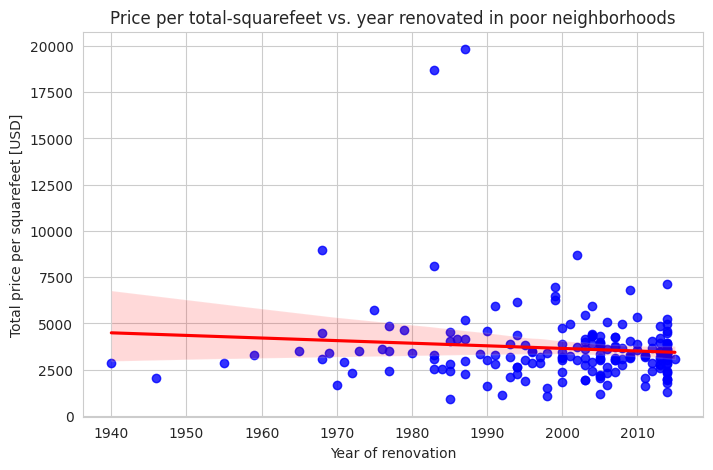

In [64]:
#now lets plot, are later renovations elevating the house prices?
fig_sqprice_yr_renovated_scatter = (sns.regplot(data=df_poor, x='yr_renovated', y='total_sqft_price',
            scatter_kws = {"color": "blue", "alpha": 0.8},
            line_kws = {"color": "red"}, ci=98),
plt.title("Price per total-squarefeet vs. year renovated in poor neighborhoods"),
plt.xlabel('Year of renovation'),
plt.ylabel('Total price per squarefeet [USD]'))
count_renov = df_poor[df_poor['renovated'] == True]['renovated'].count()
plt.savefig("fig_sqprice_yr_renovated_scatter", dpi=300)
print('A total of',count_renov,'houses have been renovated in the poor neighborhoods \n'
'and the correlation between the price and the year of renovation is', corr_price_renov_poor,':')

In [ ]:
sns.barplot(data=df_poor, x='renovated', y='total_sqft_price', hue='zipcode', palette='colorblind')

In [ ]:
fig_sqprice_renovated_bar = (sns.catplot(
    data=df_poor, kind="bar",
    x="zipcode", y="total_sqft_price", hue="renovated",
    errorbar=('ci', 95), palette="colorblind", alpha=.6, height=8, capsize=.2), 
plt.title("Total Squarefeet prices in poor neighborhoods of renovated and unrenovated houses"),
plt.xlabel('Zipcode of neighborhood'),
plt.ylabel('Total price per squarefeet [USD]'))
#plt.legend(title="Have been renovated")
plt.savefig("fig_sqprice_renovated_bar", dpi=300)


In [ ]:
fig_price_renovated_bar = (sns.catplot(
    data=df_poor, kind="bar",
    x="zipcode", y="price", hue="renovated",
    errorbar=('ci', 95), palette="rainbow", alpha=1, height=8, capsize=.2), 
plt.title("Total house prices in poor neighborhoods of renovated and unrenovated houses"),
plt.xlabel('Zipcode of neighborhood'),
plt.ylabel('Total house price [USD]'))

In [ ]:
sns.boxplot(data=df_poor, x='yr_renovated', y='price')

In [ ]:
# well, this somehow also means, the increase in value is about 2,6%-....internet says the return of investion (ROI) is:
# ROI= (Value Increase−Cost of Renovation)/Cost of Renovation ×100%
# and an renovating multiple rooms, in particular kitchens brings the most profit, followed from bathroom Remodels and roof repairs



3. Renovating a house increases its worth, independent of the region it is located in.<b>


In [ ]:
#create a scatter plot demonstrating the prices vs. the year renovated:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 

sns.scatterplot(data=db_request, x='yr_renovated', y='total_sqft_price', hue="zipcode")

# Ästhetik des Plots anpassen
plt.title("Price vs. year renovated")
plt.xlabel('year of renovation')
plt.ylabel('total house price')
plt.legend(title="Zipcode")  # Legende für die Farben einfügen

corr_price_renov = db_request['yr_renovated'].corr(db_request['total_sqft_price'])
plt.show(), print('The correlation is', corr_price_renov)



In [ ]:
sns.regplot(data=db_request, x='yr_renovated', y='total_sqft_price',
            scatter_kws = {"color": "green", "alpha": 0.8},
            line_kws = {"color": "blue"}, ci=98)
plt.title("Price per total-squarefeet vs. year renovated in whole Kings County")
plt.xlabel('Year of renovation'),
plt.ylabel('Total price per squarefeet [USD]')
print('The correlation is', corr_price_renov)

In [ ]:
fig_sqprice_renovated_bar = (sns.catplot(
    data=db_request, kind="bar",
    x="renovated", y="total_sqft_price", hue="renovated",
    errorbar=('ci', 95), palette="dark", alpha=.6, height=8, capsize=.2), 
plt.title("Total Squarefeet prices of renovated and unrenovated houses in Kings County"),
plt.xlabel('Renovated'),
plt.ylabel('Total squarefeet price [USD]'))

In [ ]:
fig_sqprice_renovated_bar = (sns.catplot(
    data=db_request, kind="bar",
    x="renovated", y="price", hue="renovated",
    errorbar=('ci', 95), palette="rainbow", alpha=.6, height=8, capsize=.2), 
plt.title("Total house prices in Kings County of renovated and unrenovated houses"),
plt.xlabel('Renovated'),
plt.ylabel('Total house price [USD]'))

## Coming to an end:

Therefore, I will analyse my DB for:
* <span style="color:black"> zip codes, where houses are significantly cheaper compared to the average in the distance to the city center?
* <span style="color:black"> houses, which weren't renovated for a very long time and/or are in a bad (not worst) overall condition and/or have a low (not worst) overall grade? <br>
* <span style="color:black"> investigate the relative profit per region a renovation does to estimate the "minimal profit"?

In [ ]:
#renovating multiple rooms, in particular kitchens brings the most profit, followed from bathroom Remodels and roof repairs
total_sqft_price_q1 = db_request.total_sqft_price.quantile(0.25)
prefinal_recom = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_q1)&(df_poor['yr_renovated'].isna()) & (df_poor['condition']==2) & (df_poor['grade']<=7) & (df_poor['bedrooms']>=3)][['house_id','zipcode','bedrooms','bathrooms','yr_renovated', 'price']]
final_plot = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_q1)&(df_poor['yr_renovated'].isna()) & (df_poor['condition']==2) & (df_poor['grade']<=7) & (df_poor['bedrooms']>=3)&(df_poor['bathrooms']<3)]

prefinal_recom

# Final recommendations:


In [ ]:
final_recom = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_q1)&(df_poor['yr_renovated'].isna()) & (df_poor['condition']==2) & (df_poor['grade']<=7) & (df_poor['bedrooms']>=3)&(df_poor['bathrooms']<3)][['house_id','zipcode','bedrooms','bathrooms','yr_renovated', 'price']]
final_recom

In [ ]:
import plotly.express as px


fig_final = px.scatter_mapbox(final_plot,
                           lat=final_plot.lat,
                           lon=final_plot.long,
                           title='Final recommendation of houses to buy, renovate and re-sell for community support',
                           mapbox_style='open-street-map', zoom=11,color='price',
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           size='grade', size_max=10,
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": final_plot['lat'].mean(), "lon": final_plot['long'].mean()}
                     )
fig_final.show()